In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pdt
import csv
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [51]:
## 设置常数初始化
n = 16                   #蓝球数
blueball = []             #蓝球列表
count_blueball = []       #统计蓝球数
y_total = []              #总共期数

[132, 124, 119, 126, 116, 124, 130, 111, 134, 121, 124, 139, 114, 124, 119, 135]


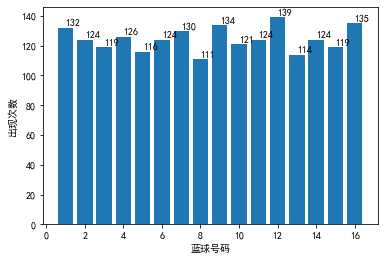

In [52]:
#网上下载的双色球数据存在ssq.txt文档中，从中读入蓝球数据
with open('ssq.txt', 'r') as f:
    lines = f.readlines()

    for line in lines:
        line = line.strip() # 把末尾的'\n'删掉
        #print(line)
        blueball += [int(line[-2:])]    #蓝球号码是每行最后2个字符


#统计各个蓝球总共出现的次数
for i in range(1,17):
    count_blueball += [blueball.count(i)]  
print(count_blueball)

y_total = range(1,len(blueball)+1)

#可视化篮球统计情况，发现基本复活随机规律，8号球目前出现次数最少

plt.bar(range(1,len(count_blueball)+1),count_blueball,label='蓝球出现次数')  

# 在柱状图上显示具体数值
for x, y in enumerate(count_blueball):
    plt.text(x+1, y + 1, '%s' % y)

# 为两条坐标轴设置名称
plt.xlabel("蓝球号码")
plt.ylabel("出现次数")
plt.show()  

In [53]:
blueball_np = np.array(blueball).reshape(-1,1)

#数据分段，训练与测试
X_train, X_test, y_train, y_test = train_test_split(blueball_np, y_total, random_state=0)
#先从线性模型开始
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))
lr.coef_: [0.4257403]
lr.intercept_: 1238.600326580525
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [-2.27401077]
lr.intercept_: 1025.2769204857234
Training set score: 0.00
Test set score: -0.01


In [54]:
#k邻近模型
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)

clf.fit(X_train, y_train)

print("Test set predictions: {}".format(clf.predict(X_test)))

print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [ 239 1587  390  421  390  286  158  286  542  560 1559  421  854  245
  158  286  854  239 1587   88  623  560  854  560  286   88 1559   88
   88   88   88  239  239  854  286   88  854  286  542  542  836 1587
  542   88  560 1587  158  560 1559  421  286  286  779   88  560 1559
  239  239  814  542  779  836 1559  854  779  854  421  421  286   88
 1559  158  623   88 1587  854  542 1559  245  245  779  779  286 1587
  421  814  421  421  239  542  836  836  239  421  158 1587  239  245
   88  814  836   88   88  390  239 1587  158 1587 1587  560  158  421
  245  390  836   88  836  560  286  158  245  421  239  239 1559  560
  421  836  814  836  286  542  854  421  779 1587   88  239  245  286
  239  158   88  814 1587  779  854  158 1559  390 1587   88  390  158
  158 1559  245  158   88  854 1559  836  814  779  854  560  854 1587
  836  814  239  542  390  854  390  286  854  421  286  245  623 1559
  542  854  542  245  836  390  245  623  286  836  854

In [55]:
#决策树模型
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.011
Accuracy on test set: 0.000


In [252]:
#核支持向量机
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
import mglearn

X_train, X_test, y_train, y_test = train_test_split(blueball_np, y_total,random_state=42)

#svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X_train, y_train)
# 计算训练数据的最小值和最大值
scaler = MinMaxScaler().fit(X_train)
# 对训练数据进行缩放

scaler.data_max_
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# 在缩放后的训练数据上学习SVM
svm.fit(X_train_scaled, y_train)
# 对测试数据进行缩放，并计算缩放后的数据的分数
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.00


[132, 124, 119, 126, 116, 124, 130, 111, 134, 121, 124, 139, 114, 124, 119, 135]


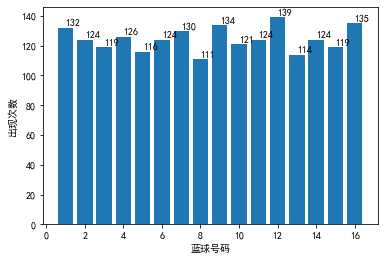

0       15
1       04
2       02
3       01
4       08
        ..
2555    16
2556    03
2557    16
2558    12
2559    11
Name: 蓝球, Length: 2560, dtype: object